In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [2]:
train = pd.read_csv("../data/inputs/train_data.csv")
test = pd.read_csv("../data/inputs/test_data.csv")

In [3]:
train.head()

,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,y
0,1,GDtyztIThRQ,[12] BGM Inazuma Eleven 3 - ~ライオコツト ダンジョン~,2011-01-09T05:50:33.000Z,UCQaNYC3dNvH8FqrEyK7hTJw,DjangoShiny,20,20.01.02,Inazuma|Eleven|Super|Once|bgm|ost|イナズマイレブン|Kyo...,114,0,7,https://i.ytimg.com/vi/GDtyztIThRQ/default.jpg,False,False,~ライオコツト ダンジョン~Inazuma Eleven 3 BGM Complete (R...,29229
1,2,m4H9s3GtTlQ,ねごと - メルシールー [Official Music Video],2012-07-23T03:00:09.000Z,UChMWDi-HBm5aS3jyRSaAWUA,ねごと Official Channel,10,20.08.02,ねごと|ネゴト|メルシールー|Re:myend|リマインド|Lightdentity|ライデ...,2885,50,111,https://i.ytimg.com/vi/m4H9s3GtTlQ/default.jpg,False,False,http://www.negoto.com/全員平成生まれ、蒼山幸子（Vo＆Key)、沙田瑞...,730280
2,3,z19zYZuLuEU,VF3tb 闇よだれvsちび太 (SEGA),2007-07-26T13:54:09.000Z,UCBdcyoZSt5HBLd_n6we-xIg,siropai,24,20.14.01,VF3|VF4|VF5|ちび太|闇よだれ|chibita|virtuafighter|seg...,133,17,14,https://i.ytimg.com/vi/z19zYZuLuEU/default.jpg,False,False,Beat-tribe cup finalhttp://ameblo.jp/siropai/,80667
3,4,pmcIOsL7s98,free frosty weekend!,2005-05-15T02:38:43.000Z,UC7K5am1UAQEsCRhzXpi9i1g,Jones4Carrie,22,19.22.12,frosty,287,51,173,https://i.ytimg.com/vi/pmcIOsL7s98/default.jpg,False,False,I look so bad but look at me!,34826
4,5,ZuQgsTcuM-4,トップ・オブ・ザ・ワールド,2007-09-09T09:52:47.000Z,UCTW1um4R-QWa8iIfITGvlZQ,Tatsuya Maruyama,10,20.08.01,ギター|guitar|南澤大介|トップオブザワールド|トップ|オブ|ワールド|カーペンターズ...,178,6,17,https://i.ytimg.com/vi/ZuQgsTcuM-4/default.jpg,False,False,ソロギターのしらべより「トップオブザワールド」です。クラシックギターで弾いてます。Offic...,172727


In [4]:
test.head()

,id,video_id,title,publishedAt,channelId,channelTitle,categoryId,collection_date,tags,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,1,xU8UcB6RbLE,Frightened Rabbit - The Greys,2007-09-26T11:00:07.000Z,UCOQ_j8Qg4-p0lGKBpXYENbg,Fatcat Records,10,20.08.01,Fatcat|Records|Frightened|Rabbit|The|Greys,471,38,61,https://i.ytimg.com/vi/xU8UcB6RbLE/default.jpg,False,False,Director: Fraser CampbellDate:2007Taken from F...
1,2,ENuB3qHCp0s,Eダンスアカデミー『EXダンス体操（EXILEのダンス体操）』,2016-05-27T15:00:00.000Z,UCip8ve30-AoX2y2OtAAmqFA,NHK,24,20.09.02,Ｅダンス|Ｅアカ|EXILE|EXダンス体操|ダンス体操|EX体操|エクササイズ、GENER...,6797,666,0,https://i.ytimg.com/vi/ENuB3qHCp0s/default.jpg,True,False,EXILEがダンスを楽しく分かりやすくレッスンする「Eダンスアカデミー」毎週金曜日に放送中！...
2,3,2eIeMPhXhSQ,『Lover Come Back To Me』 大西由希子×川口千里(Senri Kawag...,2012-12-10T08:24:57.000Z,UCZyaEXqC4i3ni68duKOg6JA,atossinternational,10,20.03.02,大西由希子|岩永真奈|川口千里|教則|長崎祥子|ジャズ|ユッコミラー|atossintern...,3371,111,212,https://i.ytimg.com/vi/2eIeMPhXhSQ/default.jpg,False,False,教則DVD『アドリブ・サックス・パーフェクト・マスター』収録の究極のギャルバンによるスタジオ...
3,4,yXfmnY6QIOc,konnkonn雛たち大きくなりました☆,2012-02-27T05:23:46.000Z,UCyeDXVF4epn-ed3c3ckyhOQ,cpj54293,15,20.02.02,オカメインコひな,508,16,23,https://i.ytimg.com/vi/yXfmnY6QIOc/default.jpg,False,False,オカメインコのひなたち約生後３９日です鳴き声が変わりましたジィージィーの中にピィッ！ピィッ！...
4,5,dGbHHMKYGkw,"Anouk - Everything, Live cover by RU kiddin me",2007-11-24T15:18:04.000Z,UCnOICsYtfygl--dfI9kclVQ,Vinzarelli,10,20.10.01,Anouk|Everything|live|cover|tribute,0,1,0,https://i.ytimg.com/vi/dGbHHMKYGkw/default.jpg,False,False,Anouk tribute band RU kiddin me covers Everyth...


(array([1.9624e+04, 5.4000e+01, 1.3000e+01, 8.0000e+00, 6.0000e+00,
        4.0000e+00, 4.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.00000000e+00, 1.07128023e+08, 2.14256043e+08, 3.21384064e+08,
        4.28512085e+08, 5.35640106e+08, 6.42768126e+08, 7.49896147e+08,
        8.57024168e+08, 9.64152188e+08, 1.07128021e+09, 1.17840823e+09,
        1.28553625e+09, 1.39266427e+09, 1.49979229e+09, 1.60692031e+09,
        1.71404833e+09, 1.82117635e+09, 1.92830437e+09, 2.03543240e+09,
        2.14256042e+09]),
 <a list of 20 Patch objects>)

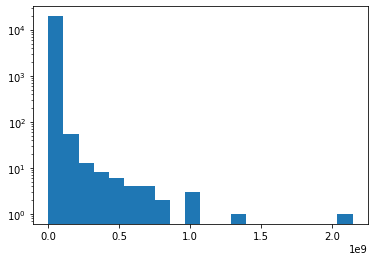

In [11]:
plt.hist(train["y"], bins=20, log=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19720 entries, 0 to 19719
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 19720 non-null  int64 
 1   video_id           19720 non-null  object
 2   title              19720 non-null  object
 3   publishedAt        19720 non-null  object
 4   channelId          19720 non-null  object
 5   channelTitle       19720 non-null  object
 6   categoryId         19720 non-null  int64 
 7   collection_date    19720 non-null  object
 8   tags               19719 non-null  object
 9   likes              19720 non-null  int64 
 10  dislikes           19720 non-null  int64 
 11  comment_count      19720 non-null  int64 
 12  thumbnail_link     19720 non-null  object
 13  comments_disabled  19720 non-null  bool  
 14  ratings_disabled   19720 non-null  bool  
 15  description        19408 non-null  object
 16  y                  19720 non-null  int64